In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!ls

Celltype mapping to PanglaoDB.txt PanglaoDB_markers_27_Mar_2020.tsv
Compare_w_Panglao.ipynb


In [3]:
df = pd.read_csv('PanglaoDB_markers_27_Mar_2020.tsv', sep='\t')
df.head()

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,Mm Hs,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,Mm Hs,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,Mm Hs,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,Mm Hs,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
4,Mm,TRY4,Acinar cells,NaN,0.007,trypsin 4,protein coding gene,1.0,Endoderm,Pancreas,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8286, 14)

In [5]:
interested_types = [
    "Platelets",
    "Erythroblasts",
    "Erythroid-like and erythroid precursor cells",
    'Hematopoietic stem cells',
    "B cells",
    "B cells memory",
    "B cells naive",
    "Basophils",
    "Dendritic cells",
    "Eosinophils",
    "Gamma delta T cells",
    "Macrophages",
    "Mast cells",
    "Megakaryocytes",
    "Monocytes",
    "Myeloid-derived suppressor cells",
    "Natural killer T cells",
    "Neutrophils",
    "NK cells",
    "Nuocytes",
    "Plasma cells",
    "Plasmacytoid dendritic cells",
    "Red pulp macrophages",
    "T cells",
    "T cells naive",
    "T cytotoxic cells",
    "T follicular helper cells",
    "T helper cells",
    "T memory cells",
    "T regulatory cells"
]

len(interested_types)

30

In [6]:
# Filter the dataframe for rows where the 'species' column includes 'Hs' and
# the 'cell type' column is in the list of interested_types
marker_genes = df[df['species'].str.contains('Hs') & df['cell type'].isin(interested_types)]
marker_genes.shape

(1859, 14)

In [7]:
len(marker_genes['cell type'].unique())

30

## Get subset of markers for each celltypes

In [8]:
# B cells
marker_B = ['B cells', 'B cells memory', 'B cells naive', 'Plasma cells']
df_marker_B = marker_genes[marker_genes['cell type'].isin(marker_B)]
print('B cells:', df_marker_B.shape)

# CD4 T
marker_CD4T = ['T helper cells', 'T follicular helper cells', 'T regulatory cells']
df_marker_CD4T = marker_genes[marker_genes['cell type'].isin(marker_CD4T)]
print('CD4 T:', df_marker_CD4T.shape)

# CD8 T
marker_CD8T = ['T cytotoxic cells']
df_marker_CD8T = marker_genes[marker_genes['cell type'].isin(marker_CD8T)]
print('CD8 T:', df_marker_CD8T.shape)

# DC
marker_DC = ['Dendritic cells', 'Plasmacytoid dendritic cells']
df_marker_DC = marker_genes[marker_genes['cell type'].isin(marker_DC)]
print('DC:', df_marker_DC.shape)

# Mono
marker_Mono = ['Monocytes']
df_marker_Mono = marker_genes[marker_genes['cell type'].isin(marker_Mono)]
print('Mono:', df_marker_Mono.shape)

# NK
marker_NK = ['NK cells']
df_marker_NK = marker_genes[marker_genes['cell type'].isin(marker_NK)]
print('NK:', df_marker_NK.shape)

# other
marker_other = ['Platelets', 'Erythroblasts', 'Erythroid-like and erythroid precursor cells', 'Hematopoietic stem cells', 'Nuocytes', 'Red pulp macrophages']
df_marker_other = marker_genes[marker_genes['cell type'].isin(marker_other)]
print('other:', df_marker_other.shape)

# other T
marker_otherT = ['T cells', 'T cells naive', 'T memory cells']
df_marker_otherT = marker_genes[marker_genes['cell type'].isin(marker_otherT)]
print('other T:', df_marker_otherT.shape)

B cells: (319, 14)
CD4 T: (94, 14)
CD8 T: (8, 14)
DC: (176, 14)
Mono: (99, 14)
NK: (80, 14)
other: (338, 14)
other T: (154, 14)


## Check if gene names in adata is compatible with gene names in DB

In [12]:
import scanpy as sc

adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378.h5ad')
print('Original adata:', adata.shape)
label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
types = [s.replace(' ', '_') for s in types]
print('all cell types:', types)
print('====================')


Original adata: (161764, 33538)
all cell types: ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


In [43]:
# adata 裡面gene 和 DB裡面gene的交集
all_genes = adata.var_names.tolist()
print('all_genes:', len(all_genes))
db_all_genes = marker_genes['official gene symbol'].tolist()
db_all_genes_unique = list(set(db_all_genes))
print('db_all_genes_unique:', len(db_all_genes_unique))
common_genes = list(set(all_genes) & set(db_all_genes))
print('common_genes:', len(common_genes))



all_genes: 33538
db_all_genes_unique: 1188
common_genes: 1177


In [21]:
len(db_all_genes)

1859

In [25]:
missing_in_adata = list(set(db_all_genes) - set(common_genes))  # 1188-1177
missing_in_adata

['C1ORF54',
 'RPL3P7',
 'PFN1P1',
 'C11ORF80',
 'GUSBP11',
 'IGLL3P',
 'EEF1B2P3',
 'GPX1',
 'C2ORF88',
 'CLCA3P',
 'PTGDS ']

## Read PreLect features

In [44]:
import os
os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_GSE/L1_by_lossdiff/feature_selection')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [61]:
types

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [146]:
from matplotlib_venn import venn2

def compare_PreLect_w_marker(celltype, PreLect_dict, marker_df, name=''):
    if name == '':
        name = celltype
    # Extracting the features and marker genes
    feature_df = PreLect_dict[celltype]
    features = feature_df['Gene'].tolist()
    marker_genes = marker_df['official gene symbol'].tolist()

    # Finding common elements
    common = list(set(features) & set(marker_genes))
    print(celltype, 'common with markers:', len(common))
    
    # Preparing sets for Venn diagram
    features_set = set(features)
    marker_genes_set = set(marker_genes)
    
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([features_set, marker_genes_set], set_labels=('PreLect', f'{name} Marker'))
    plt.title(name, fontsize=16)

    for text in v.set_labels:
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    return common


## B

B common with markers: 7


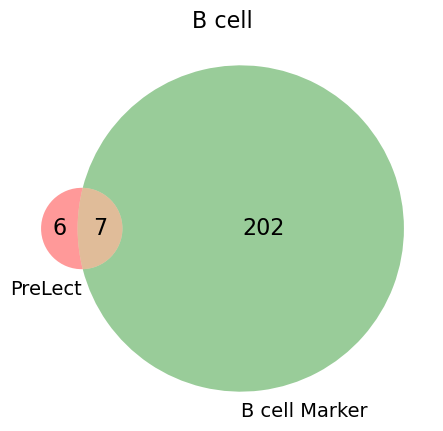

B_common: ['CD74', 'IGHM', 'HLA-DRA', 'IGKC', 'CD79A', 'IGLC2', 'MS4A1']


In [147]:
B_common = compare_PreLect_w_marker('B', features_dict, df_marker_B, name='B cell')
print('B_common:', B_common)

B common with markers: 7


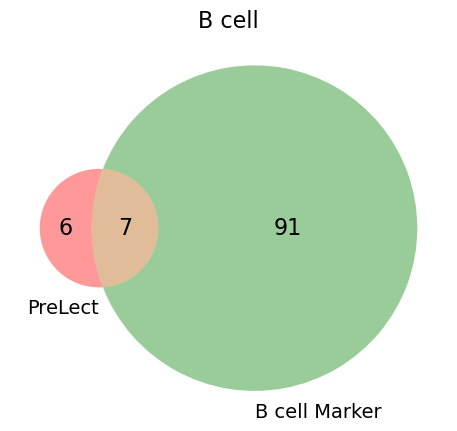

B_common: ['CD74', 'IGHM', 'HLA-DRA', 'IGKC', 'CD79A', 'IGLC2', 'MS4A1']


In [148]:
# select only 'B cells' from the marker_genes DB
b = marker_genes[marker_genes['cell type'].isin(['B cells'])]
b.shape
B_common = compare_PreLect_w_marker('B', features_dict, b, name='B cell')
print('B_common:', B_common)

## CD4_T

CD4_T common with markers: 7


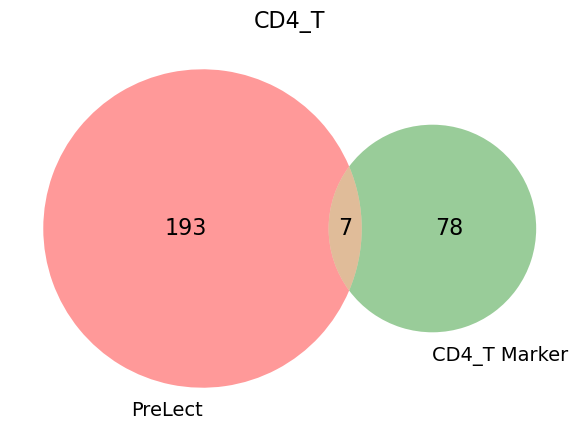

CD4t_common: ['RORA', 'CD4', 'MAF', 'CD40LG', 'CD3D', 'CD2', 'CD3G']


In [138]:
CD4t_common = compare_PreLect_w_marker('CD4_T', features_dict, df_marker_CD4T)
print('CD4t_common:', CD4t_common)

CD4_T common with markers: 20


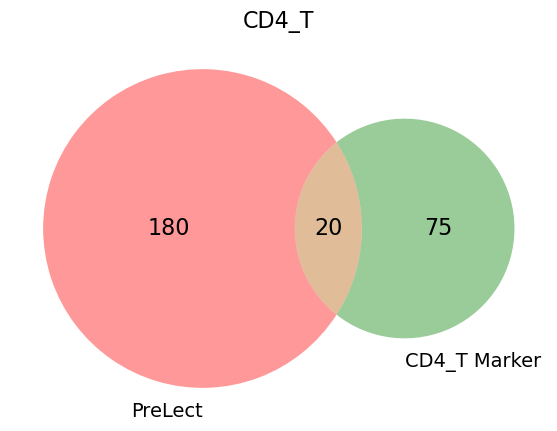

CD4t_common: ['DUSP2', 'CD247', 'IL7R', 'CD7', 'TRAC', 'RORA', 'TNFAIP3', 'LTB', 'CD2', 'CD3G', 'TRBC2', 'CD3E', 'CD4', 'CTSW', 'CD52', 'S100A4', 'CCL5', 'IL32', 'CD3D', 'CD6']


In [139]:
# compare CD4T PreLect with all T cells markers
t = marker_genes[marker_genes['cell type'].isin(['T cells'])]
CD4t_common = compare_PreLect_w_marker('CD4_T', features_dict, t)
print('CD4t_common:', CD4t_common)

CD4_T common with markers: 14


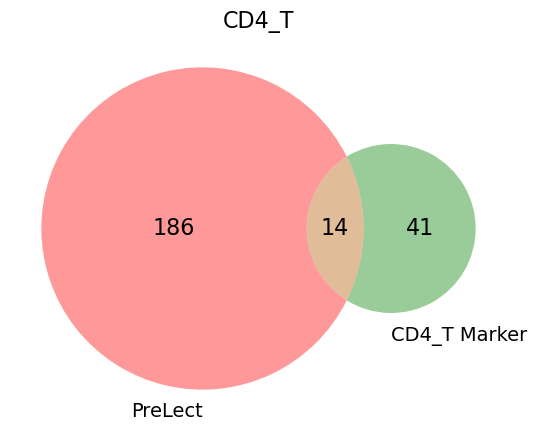

CD4t_common: ['TRBC2', 'CD3D', 'CD247', 'S100A9', 'CD3E', 'CD4', 'CD7', 'TRAC', 'CD2', 'IKZF1', 'IL7R', 'LTB', 'NKG7', 'CD3G']


In [140]:
# compare CD4T PreLect with T naive and T memory cells markers
t_naive_memory = marker_genes[marker_genes['cell type'].isin(['T cells naive', 'T memory cells'])]
CD4t_common = compare_PreLect_w_marker('CD4_T', features_dict, t_naive_memory)
print('CD4t_common:', CD4t_common)

## CD8 T

CD8_T common with markers: 2


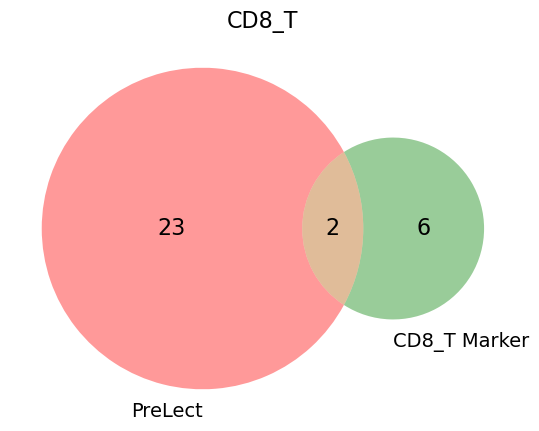

CD8t_common: ['CD8A', 'TRAC']


In [141]:
CD8t_common = compare_PreLect_w_marker('CD8_T', features_dict, df_marker_CD8T)
print('CD8t_common:', CD8t_common)

CD8_T common with markers: 8


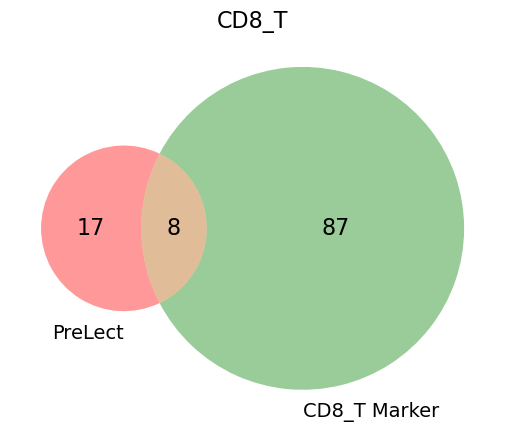

CD8t_common: ['CD8B', 'TRAC', 'S100A4', 'CD8A', 'CCL5', 'LTB', 'CD3D', 'CD3G']


In [142]:
# compare CD8T PreLect with all T cells markers
t = marker_genes[marker_genes['cell type'].isin(['T cells'])]
CD8t_common = compare_PreLect_w_marker('CD8_T', features_dict, t)
print('CD8t_common:', CD8t_common)

CD8_T common with markers: 4


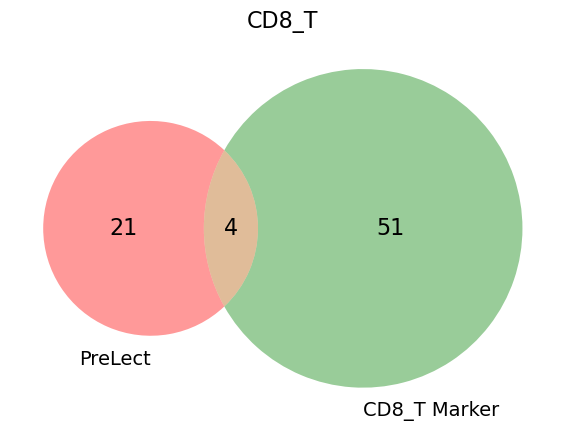

CD8t_common: ['LTB', 'TRAC', 'CD3D', 'CD3G']


In [143]:
# compare CD8T PreLect with T naive and T memory cells markers
t_naive_memory = marker_genes[marker_genes['cell type'].isin(['T cells naive', 'T memory cells'])]
CD8t_common = compare_PreLect_w_marker('CD8_T', features_dict, t_naive_memory)
print('CD8t_common:', CD8t_common)

## DC

DC common with markers: 8


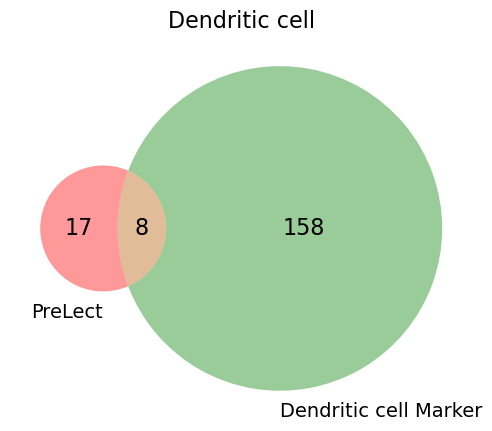

DC_common: ['FTL', 'FCER1A', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DPA1', 'TCF4', 'HLA-DRA', 'IRF8']


In [150]:
DC_common = compare_PreLect_w_marker('DC', features_dict, df_marker_DC, name='Dendritic cell')
print('DC_common:', DC_common)

## Mono

Mono common with markers: 6


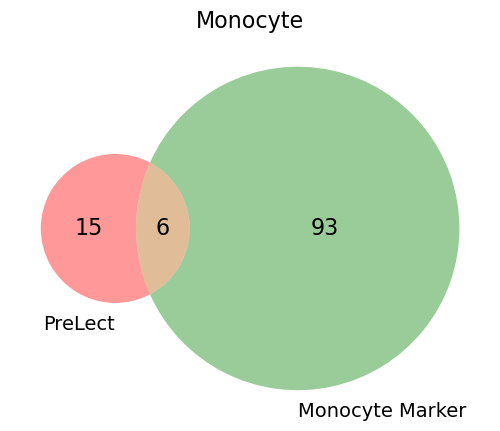

Mono_common: ['S100A8', 'S100A9', 'LST1', 'SERPINA1', 'FCN1', 'LYZ']


In [151]:
Mono_common = compare_PreLect_w_marker('Mono', features_dict, df_marker_Mono, name='Monocyte')
print('Mono_common:', Mono_common)

## NK

NK common with markers: 15


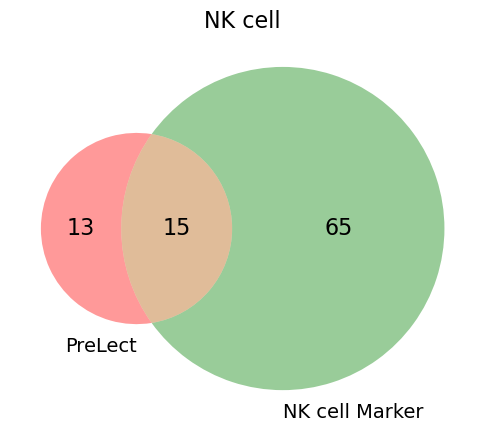

NK_common: ['GNLY', 'KLRB1', 'IL2RB', 'CD247', 'KLRF1', 'CD7', 'CTSW', 'PRF1', 'TRDC', 'S100A4', 'CCL5', 'IL32', 'KLRD1', 'SPON2', 'NKG7']


In [152]:
NK_common = compare_PreLect_w_marker('NK', features_dict, df_marker_NK, name='NK cell')
print('NK_common:', NK_common)

## other T

other_T common with markers: 12


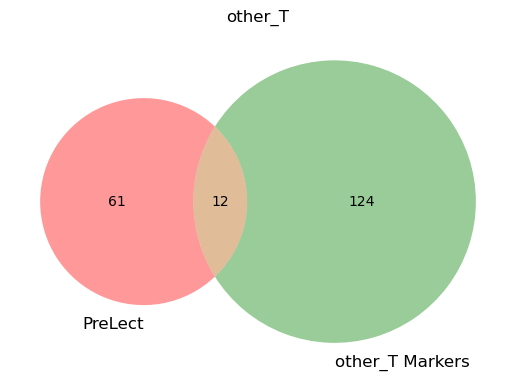

otherT_common: ['CD3D', 'DUSP2', 'GZMK', 'KLRB1', 'CD3E', 'TRAC', 'TRDC', 'CXCR4', 'IL7R', 'LTB', 'CD2', 'CD3G']


In [78]:
otherT_common = compare_PreLect_w_marker('other_T', features_dict, df_marker_otherT)
print('otherT_common:', otherT_common)

## All T cells

In [84]:
features_dict.keys()

dict_keys(['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T'])

In [85]:
# Get the features for each cell type
CD4_T_features = set(features_dict['CD4_T']['Gene'])
CD8_T_features = set(features_dict['CD8_T']['Gene'])
other_T_features = set(features_dict['other_T']['Gene'])

# Get the union of the features
union_features = CD4_T_features.union(CD8_T_features, other_T_features)
len(union_features)


234

In [87]:
# All T cells markers form DB
marker_t_all = ["T cells", "T cells naive", "T cytotoxic cells", 
                'T helper cells', 'T follicular helper cells', 'T regulatory cells', "T memory cells"]
df_marker_t_all = marker_genes[marker_genes['cell type'].isin(marker_t_all)]
print('T cells markers:', df_marker_t_all.shape)

T cells markers: (256, 14)


T cell common with markers: 31


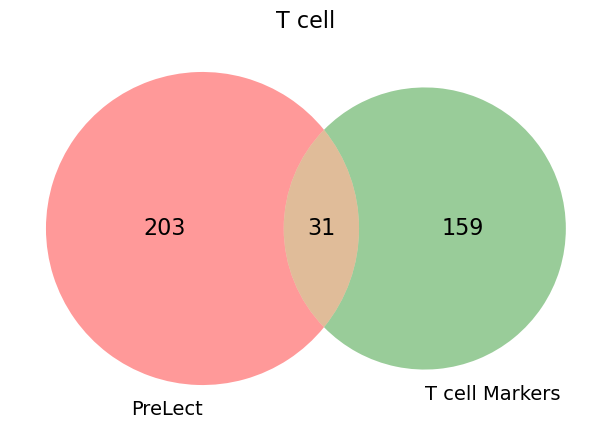

In [128]:
# Preparing sets for Venn diagram
features_set = set(union_features)
marker_genes_set = set(df_marker_t_all['official gene symbol'].tolist())

# Finding common elements
common = list(set(union_features) & marker_genes_set)
print('T cell', 'common with markers:', len(common))


# Plotting Venn diagram
plt.figure(figsize=(8, 5))
v = venn2([features_set, marker_genes_set], set_labels=('PreLect', 'T cell Markers'))
plt.title('T cell', fontsize=16)

for text in v.set_labels:
    text.set_fontsize(14)
for text in v.subset_labels:
    text.set_fontsize(16)
plt.show()